Today's homework is to utilize kmeans and random forest on two different datasets of your choice. Show a plot of the points, and give the points a color label to represent it's underlying class as predicted by the two different methods. Show the discussion boundary if and when it is appropriate. Also explain in a write up how both methods work, at a high level, and how they differ between each other. Also inherently what is the biggest problem you will face using kmeans? Also why not just use a decision tree over random forest? 

### WRITEUP IN README FILE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
iris = datasets.load_iris()

In [18]:
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
 
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

In [19]:
x.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
y.head()

,Targets
0,0
1,0
2,0
3,0
4,0


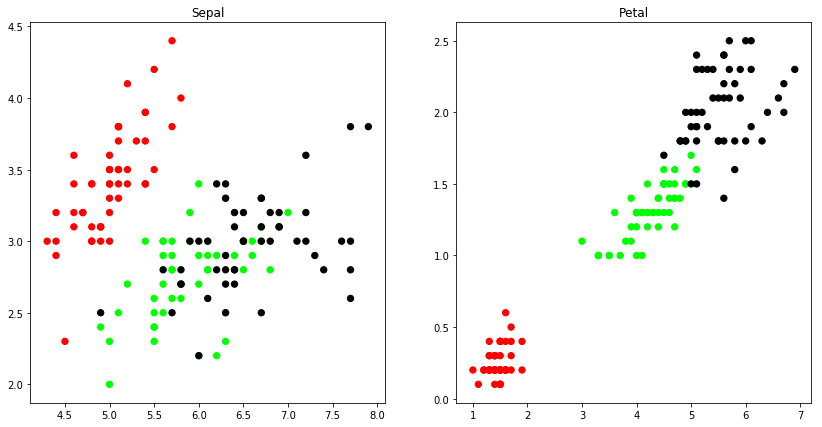

In [30]:
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('Sepal')
# Plot Petal
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Petal')

plt.show()

## Petal width/length look to be the two best features to look at

In [32]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

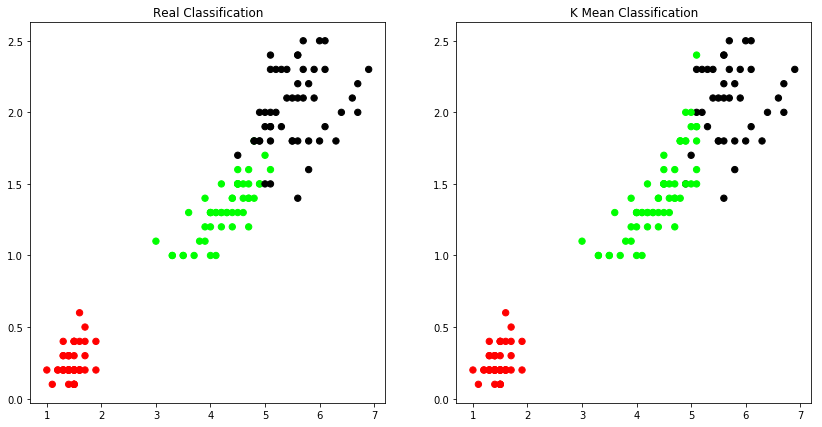

In [117]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])

# line up the classification classes
predY = np.choose(model.labels_, [2, 0, 1]).astype(np.int64)

# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
 
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[predY], s=40)
plt.title('K Mean Classification')

plt.show()

In [66]:
import sklearn.metrics as sm

print sm.accuracy_score(y, predY)


0.893333333333


In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y , random_state = 1)


clf = RandomForestClassifier(n_estimators=1000)

clf.fit(X_train, y_train)

predicted = clf.predict(X_test)


C:\Users\Admin\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


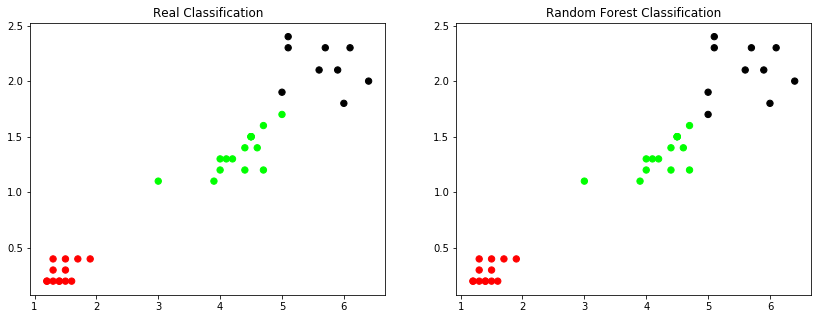

In [114]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,5))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])

# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(X_test.Petal_Length, X_test.Petal_Width, c=colormap[y_test.Targets], s=40)
plt.title('Real Classification')
 
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(X_test.Petal_Length, X_test.Petal_Width, c=colormap[predicted], s=40)
plt.title('Random Forest Classification')

plt.show()

In [113]:
print sm.accuracy_score(predicted, y_test)


0.973684210526
